In [300]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [301]:
df =  pd.concat([pd.read_csv(r"dataset\my_test_features.csv"),
                 pd.read_csv(r"dataset\my_train_features.csv")])

In [302]:
df.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,backward,upperside,1197.3,left,small,Agreeableness
1,vertical,baseline,706.1,right,small,Agreeableness
2,backward,upperside,1604.0,right,small,Agreeableness
3,vertical,lowerside,1214.3,right,medium,Agreeableness
4,backward,upperside,1046.6,left,small,Agreeableness


In [303]:
letter_slant_mapping = {'backward': -1, 'forward': 1, 'vertical': 0}
line_slant_mapping = {'lowerside': -1, 'baseline': 0, 'upperside': 1}
margin_slope_mapping = {'left': -1, 'straight': 0, 'right': 1}
word_spacing_mapping = {'small': -1, 'medium': 0, 'large': 1}

In [304]:
df["letter_slant"] = df["letter_slant"].map(letter_slant_mapping)
df["line_slant"] = df["line_slant"].map(line_slant_mapping)
df["margin_slope"] = df["margin_slope"].map(margin_slope_mapping)
df["word_spacing"] = df["word_spacing"].map(word_spacing_mapping)

In [305]:
df.head()

,letter_slant,line_slant,letter_size,margin_slope,word_spacing,personality
0,-1,1,1197.3,-1,-1,Agreeableness
1,0,0,706.1,1,-1,Agreeableness
2,-1,1,1604.0,1,-1,Agreeableness
3,0,-1,1214.3,1,0,Agreeableness
4,-1,1,1046.6,-1,-1,Agreeableness


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.1+ KB


In [307]:
df.isnull().sum()

letter_slant    0
line_slant      0
letter_size     0
margin_slope    0
word_spacing    0
personality     0
dtype: int64

In [308]:
df.dropna(inplace=True)

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, 0 to 176
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   letter_slant  221 non-null    int64  
 1   line_slant    221 non-null    int64  
 2   letter_size   221 non-null    float64
 3   margin_slope  221 non-null    int64  
 4   word_spacing  221 non-null    int64  
 5   personality   221 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 12.1+ KB


In [310]:
# X = df.drop("personality",axis=1)
# y = df["personality"]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
# print(f"{X_train.shape, y_train.shape, X_test.shape, y_test.shape}")

In [311]:
aggreableness_data = df[df["personality"] == "Agreeableness"]
conscientiousness_data = df[df["personality"] == "Conscientiousness"]
extraversion_data = df[df["personality"] == "Extraversion"]
openness_data = df[df["personality"] == "Openness"]
neuroticism_data = df[df["personality"] == "Neuroticism"]

In [312]:
aggreableness_x = aggreableness_data.drop("personality", axis=1)
aggreableness_y = aggreableness_data["personality"]

conscientiousness_x = conscientiousness_data.drop("personality", axis=1)
conscientiousness_y = conscientiousness_data["personality"]

extraversion_x = extraversion_data.drop("personality", axis=1)
extraversion_y = extraversion_data["personality"]

openness_x = openness_data.drop("personality", axis=1)
openness_y = openness_data["personality"]

neuroticism_x = neuroticism_data.drop("personality", axis=1)
neuroticism_y = neuroticism_data["personality"]

In [313]:
aggreableness_x_train, aggreableness_x_test, aggreableness_y_train, aggreableness_y_test = train_test_split(aggreableness_x, aggreableness_y, test_size=0.1, shuffle=True)

conscientiousness_x_train, conscientiousness_x_test, conscientiousness_y_train, conscientiousness_y_test = train_test_split(conscientiousness_x, conscientiousness_y, test_size=0.1, shuffle=True)

extraversion_x_train, extraversion_x_test, extraversion_y_train, extraversion_y_test = train_test_split(extraversion_x, extraversion_y, test_size=0.1, shuffle=True)

openness_x_train, openness_x_test, openness_y_train, openness_y_test = train_test_split(openness_x, openness_y, test_size=0.1, shuffle=True)

neuroticism_x_train, neuroticism_x_test, neuroticism_y_train, neuroticism_y_test = train_test_split(neuroticism_x, neuroticism_y, test_size=0.1, shuffle=True)

In [314]:
X_train = pd.concat([
    aggreableness_x_train, 
    conscientiousness_x_train, 
    extraversion_x_train, 
    neuroticism_x_train, 
    openness_x_train
])

y_train = pd.concat([
    aggreableness_y_train, 
    conscientiousness_y_train, 
    extraversion_y_train, 
    neuroticism_y_train, 
    openness_y_train
])

X_test = pd.concat([
    aggreableness_x_test, 
    conscientiousness_x_test, 
    extraversion_x_test, 
    neuroticism_x_test, 
    openness_x_test
])

y_test = pd.concat([
    aggreableness_y_test, 
    conscientiousness_y_test, 
    extraversion_y_test, 
    neuroticism_y_test, 
    openness_y_test
])

In [315]:
print(f"{X_train.shape, y_train.shape, X_test.shape, y_test.shape}")

((197, 5), (197,), (24, 5), (24,))


In [316]:
rf = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_rf

array(['Agreeableness', 'Neuroticism', 'Agreeableness', 'Neuroticism',
       'Openness', 'Extraversion', 'Conscientiousness', 'Neuroticism',
       'Openness', 'Neuroticism', 'Extraversion', 'Neuroticism',
       'Agreeableness', 'Agreeableness', 'Openness', 'Neuroticism',
       'Neuroticism', 'Openness', 'Openness', 'Openness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Agreeableness'],
      dtype=object)

In [317]:
print(f"Accuracy for Random Forest: {round(accuracy_score(y_test, y_pred_rf) * 100, 2)}%")

Accuracy for Random Forest: 41.67%


In [318]:
accuracies = []
for i in range(1, X_train.shape[0] + 1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
max_accuracy_knn = max(accuracies)
max_index_knn = accuracies.index(max_accuracy_knn)
print(f"Best accuracy {round(max_accuracy_knn * 100, 2)}% for KNN with k = {max_index_knn + 1}")

Best accuracy 54.17% for KNN with k = 13


In [319]:
knn = KNeighborsClassifier(n_neighbors=max_index_knn + 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_knn

array(['Agreeableness', 'Neuroticism', 'Openness', 'Conscientiousness',
       'Conscientiousness', 'Agreeableness', 'Openness', 'Openness',
       'Openness', 'Conscientiousness', 'Neuroticism', 'Neuroticism',
       'Agreeableness', 'Agreeableness', 'Openness', 'Openness',
       'Openness', 'Agreeableness', 'Openness', 'Openness', 'Openness',
       'Openness', 'Openness', 'Openness'], dtype=object)

In [320]:
print(f"Accuracy for KNN: {round(accuracy_score(y_test, y_pred_knn) * 100, 2)}%")

Accuracy for KNN: 54.17%


In [321]:
import joblib
import os
joblib.dump(rf, "./saved_models/type2/rf.joblib", compress=3)
print(f"Random forest model saved: {np.round(os.path.getsize('./saved_models/type2/rf.joblib') / 1024 / 1024, 2) } MB")
joblib.dump(knn, "./saved_models/type2/knn.joblib", compress=3)
print(f"KNN model saved: {np.round(os.path.getsize('./saved_models/type2/knn.joblib') / 1024 / 1024, 2) } MB")

df_train_save = pd.concat([X_train, y_train], axis=1)
df_train_save.to_csv("./saved_models/type2/train.csv", index=False)
df_test_save = pd.concat([X_test, y_test], axis=1)
df_test_save.to_csv("./saved_models/type2/test.csv", index=False)

Random forest model saved: 0.27 MB
KNN model saved: 0.0 MB


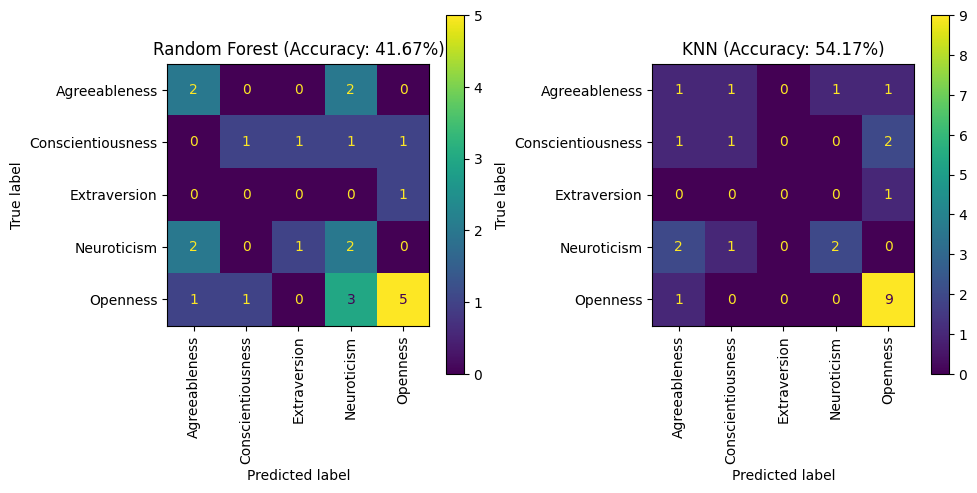

In [322]:
import matplotlib.pyplot as plt

cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_knn = confusion_matrix(y_test, y_pred_knn)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp1.plot(ax=ax1, xticks_rotation="vertical")
ax1.set_title(f"Random Forest (Accuracy: {round(accuracy_score(y_test, y_pred_rf) * 100, 2)}%)")

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp2.plot(ax=ax2, xticks_rotation="vertical")
ax2.set_title(f"KNN (Accuracy: {round(accuracy_score(y_test, y_pred_knn) * 100, 2)}%)")

plt.tight_layout()
plt.show()
